# Statistics from Madplanner ⚡️📊

<img width=300 src="https://i.pinimg.com/474x/6a/18/df/6a18dff64059bb388ed1046c0f2cc350.jpg">

### Importing libraries and data 📚

In [1]:
import sys
sys.path.append('../')

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import src.statistics as s
import json
from pymongo import MongoClient
from dotenv import load_dotenv
import os
load_dotenv()

True

In [3]:
url_mongo = os.getenv("url")
conn = MongoClient(url_mongo)
db = conn.get_database("madrid")

In [4]:
users = db.get_collection("users")

In [5]:
datitos = list(users.find({}))

In [6]:
df = pd.DataFrame.from_dict(datitos)

In [7]:
df.drop(["_id"],axis=1,inplace=True)

## First..  Cleaning data 🧽🛀🏻

In [8]:
df["day"] = df.apply(lambda row: f"{row['time'][:11]}", axis = 1)
df["hour"] = df.apply(lambda row: f"{row['time'][11:16]}", axis = 1)
df["month"] = df.apply(lambda row: int(f"{row['time'][5:7]}"), axis = 1)
df["moment"] = df.hour.apply(s.daynnite)
df["age"] = df.apply(lambda row: int(float(f"{row['age']}")), axis = 1)
df["weekday"] = df.apply(lambda row: int(f"{row['weekday']}"), axis = 1)

In [9]:
df["category"] = df.category.apply(s.catint)

In [10]:
df.dtypes

name           object
age             int64
category       object
subcategory    object
time           object
weekday         int64
gender         object
ocupation      object
children       object
residence      object
filter         object
day            object
hour           object
month           int64
moment         object
dtype: object

In [48]:
df.head()

,name,age,category,subcategory,weekday,gender,ocupation,children,residence,filter,day,hour,month,moment
0,Julieta,23,party,club,2,Female,Studying,NO,Madrid,NaN,2021-05-19,13:17,5,morning
1,Juli,23,party,club,2,Female,Studying,NO,Madrid,NaN,2021-05-19,13:18,5,morning
2,Galo,45,family,NaN,2,Male,Working,YES,Madrid,type,2021-05-19,13:27,5,morning
3,Galo,40,110.0,NaN,2,Male,Working,NO,Another city in Spain,price,2021-05-19,13:30,5,morning
4,Galo,40,Madrid,Salamanca,2,Male,Working,NO,Another city in Spain,location,2021-05-19,13:31,5,morning


In [12]:
df.drop(["time"],axis=1, inplace=True)

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.sample(10)

,name,age,category,subcategory,weekday,gender,ocupation,children,residence,filter,day,hour,month,moment
30,Gala,23,friends,NaN,2,Female,Studying,NO,Outside of Spain,type,2021-05-19,15:52,5,evening
16,Pablito,15,3.0,NaN,2,Male,Studying,NO,Madrid,rating,2021-05-19,13:48,5,morning
25,Charles,24,party,club,2,Male,Working,NO,Madrid,category,2021-05-19,15:43,5,evening
9,Pablito,15,outdoors,basketball court,2,Male,Studying,NO,Madrid,category,2021-05-19,13:32,5,morning
1,Juli,23,party,club,2,Female,Studying,NO,Madrid,NaN,2021-05-19,13:18,5,morning
4,Galo,40,Madrid,Salamanca,2,Male,Working,NO,Another city in Spain,location,2021-05-19,13:31,5,morning
37,Manols,29,Madrid,Salamanca,2,Male,Working,NO,Outside of Spain,location,2021-05-19,16:05,5,evening
23,Manolo,55,Madrid,Centro,2,Male,Working,NO,Another city in Spain,location,2021-05-19,13:57,5,morning
20,Manolo,55,80.0,NaN,2,Male,Working,NO,Another city in Spain,price,2021-05-19,13:54,5,morning
38,Manols,29,individual,NaN,2,Male,Working,NO,Outside of Spain,type,2021-05-19,16:05,5,evening


In [15]:
df.name.unique()

array(['Julieta', 'Juli', 'Galo', 'Pablito', 'Clara', 'didi', 'Manolo',
       'Charles', 'Gala', 'Manols'], dtype=object)

## Now, let's start analysing! 🐼😉

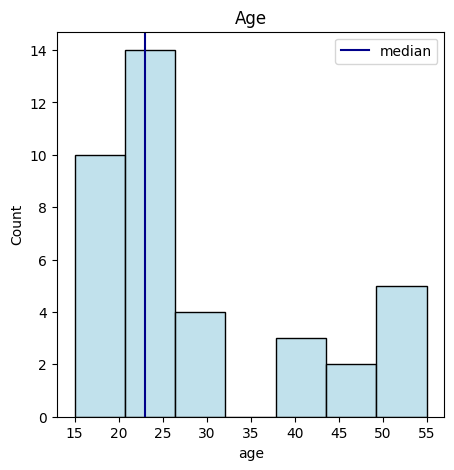

In [16]:
s.histploteo("age","Age",df).show()

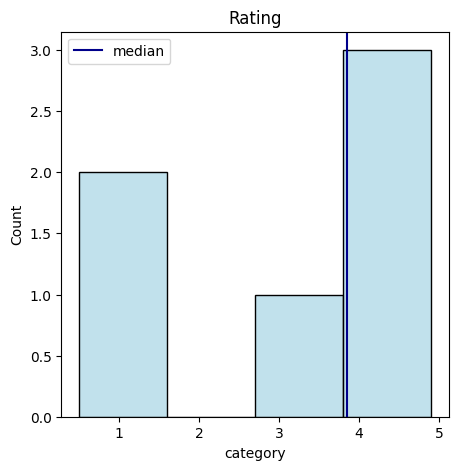

In [17]:
s.histploteo("category","Rating",df[df["filter"]=="rating"]).show()

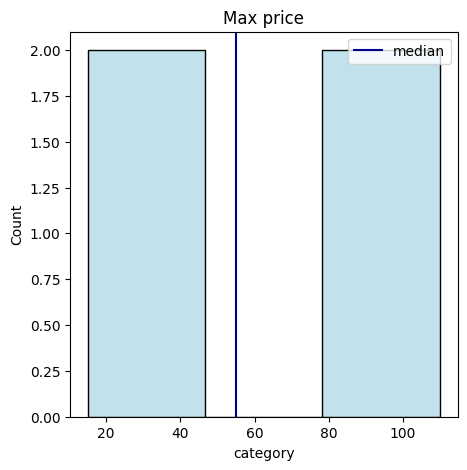

In [18]:
s.histploteo("category","Max price",df[df["filter"]=="price"]).show()

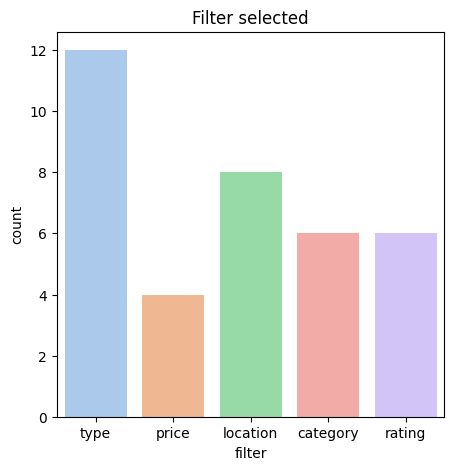

In [19]:
s.countploteo_no_hue("filter","Filter selected",df).show()

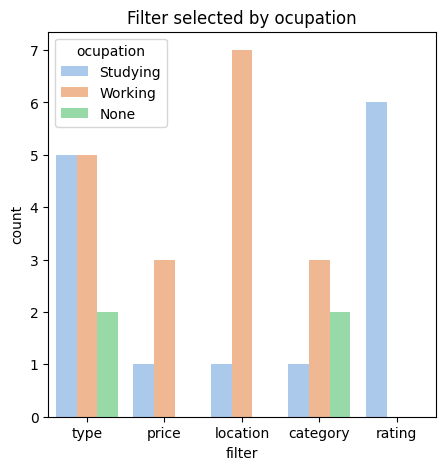

In [20]:
s.countploteo("filter","ocupation","Filter selected by ocupation",df).show()

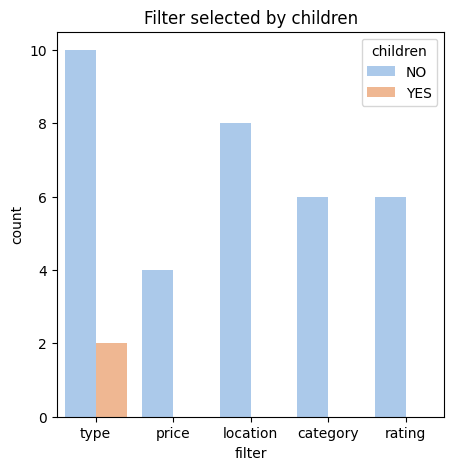

In [21]:
s.countploteo("filter","children","Filter selected by children",df).show()

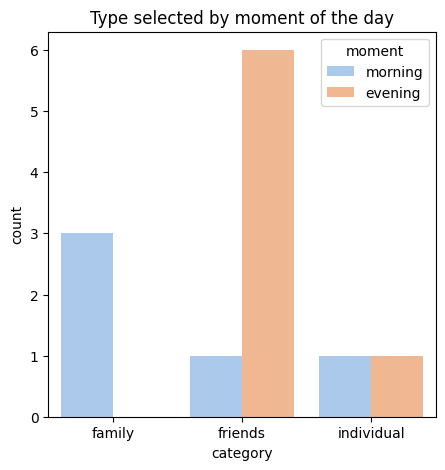

In [22]:
s.countploteo("category","moment","Type selected by moment of the day",df[df["filter"]=="type"]).show()

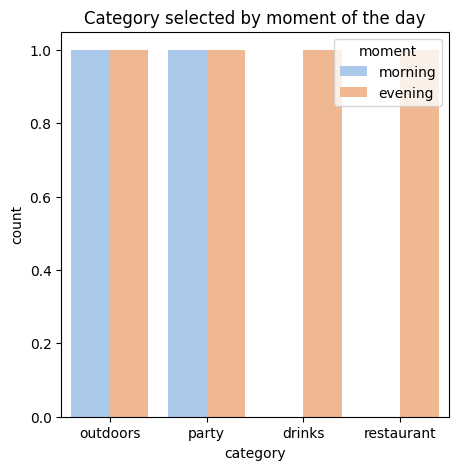

In [23]:
s.countploteo("category","moment","Category selected by moment of the day",df[df["filter"]=="category"]).show()

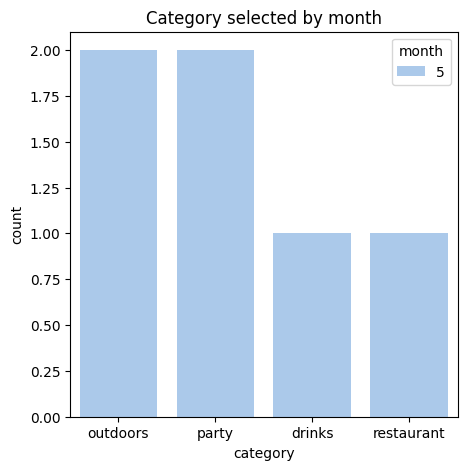

In [24]:
s.countploteo("category","month","Category selected by month",df[df["filter"]=="category"]).show()

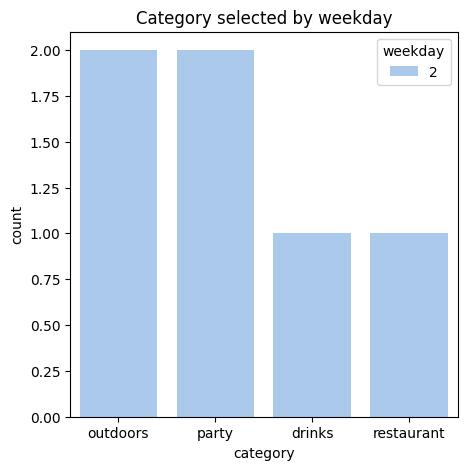

In [25]:
s.countploteo("category","weekday","Category selected by weekday",df[df["filter"]=="category"]).show()

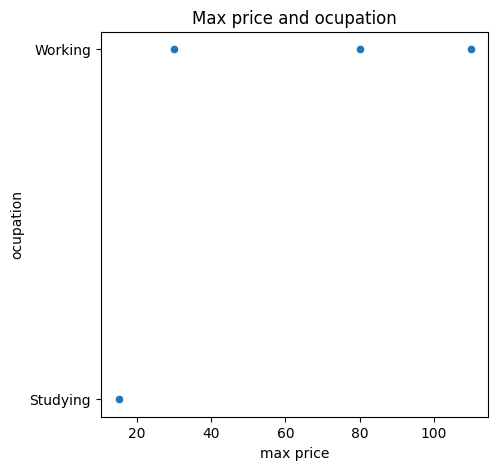

In [26]:
s.scatterploteo("category","ocupation","Max price and ocupation",df[df["filter"]=="price"],"max price").show()

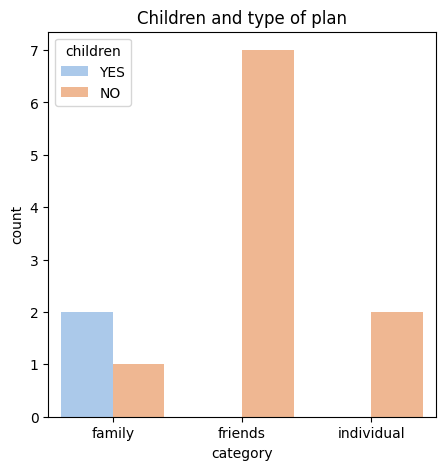

In [27]:
s.countploteo("category","children","Children and type of plan",df[df["filter"]=="type"]).show()

## Machine learning

In [28]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin_min
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


In [29]:
df_2 = df.drop(["name","category","subcategory","day","moment"],axis=1)

In [30]:
df_2["hour"] = df.apply(lambda row: int(f"{row['hour'][0:2]}"), axis = 1)
df_2.hour = df_2.hour.astype(int)
df_2.month = df_2.month.astype(int)

In [31]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 0 to 38
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        38 non-null     int64 
 1   weekday    38 non-null     int64 
 2   gender     38 non-null     object
 3   ocupation  38 non-null     object
 4   children   38 non-null     object
 5   residence  38 non-null     object
 6   filter     36 non-null     object
 7   hour       38 non-null     int64 
 8   month      38 non-null     int64 
dtypes: int64(4), object(5)
memory usage: 4.0+ KB


In [32]:
df_dummy = pd.get_dummies(df_2, prefix=['filter','gender', 'ocupation', 'children','residence'], columns=['filter','gender', 'ocupation', 'children','residence'], drop_first=True)

In [33]:
df_dummy.head(2)

,age,weekday,hour,month,filter_location,filter_price,filter_rating,filter_type,gender_Male,gender_Other,ocupation_Studying,ocupation_Working,children_YES,residence_Madrid,residence_Outside of Spain
0,23,2,13,5,0,0,0,0,0,0,1,0,0,1,0
1,23,2,13,5,0,0,0,0,0,0,1,0,0,1,0


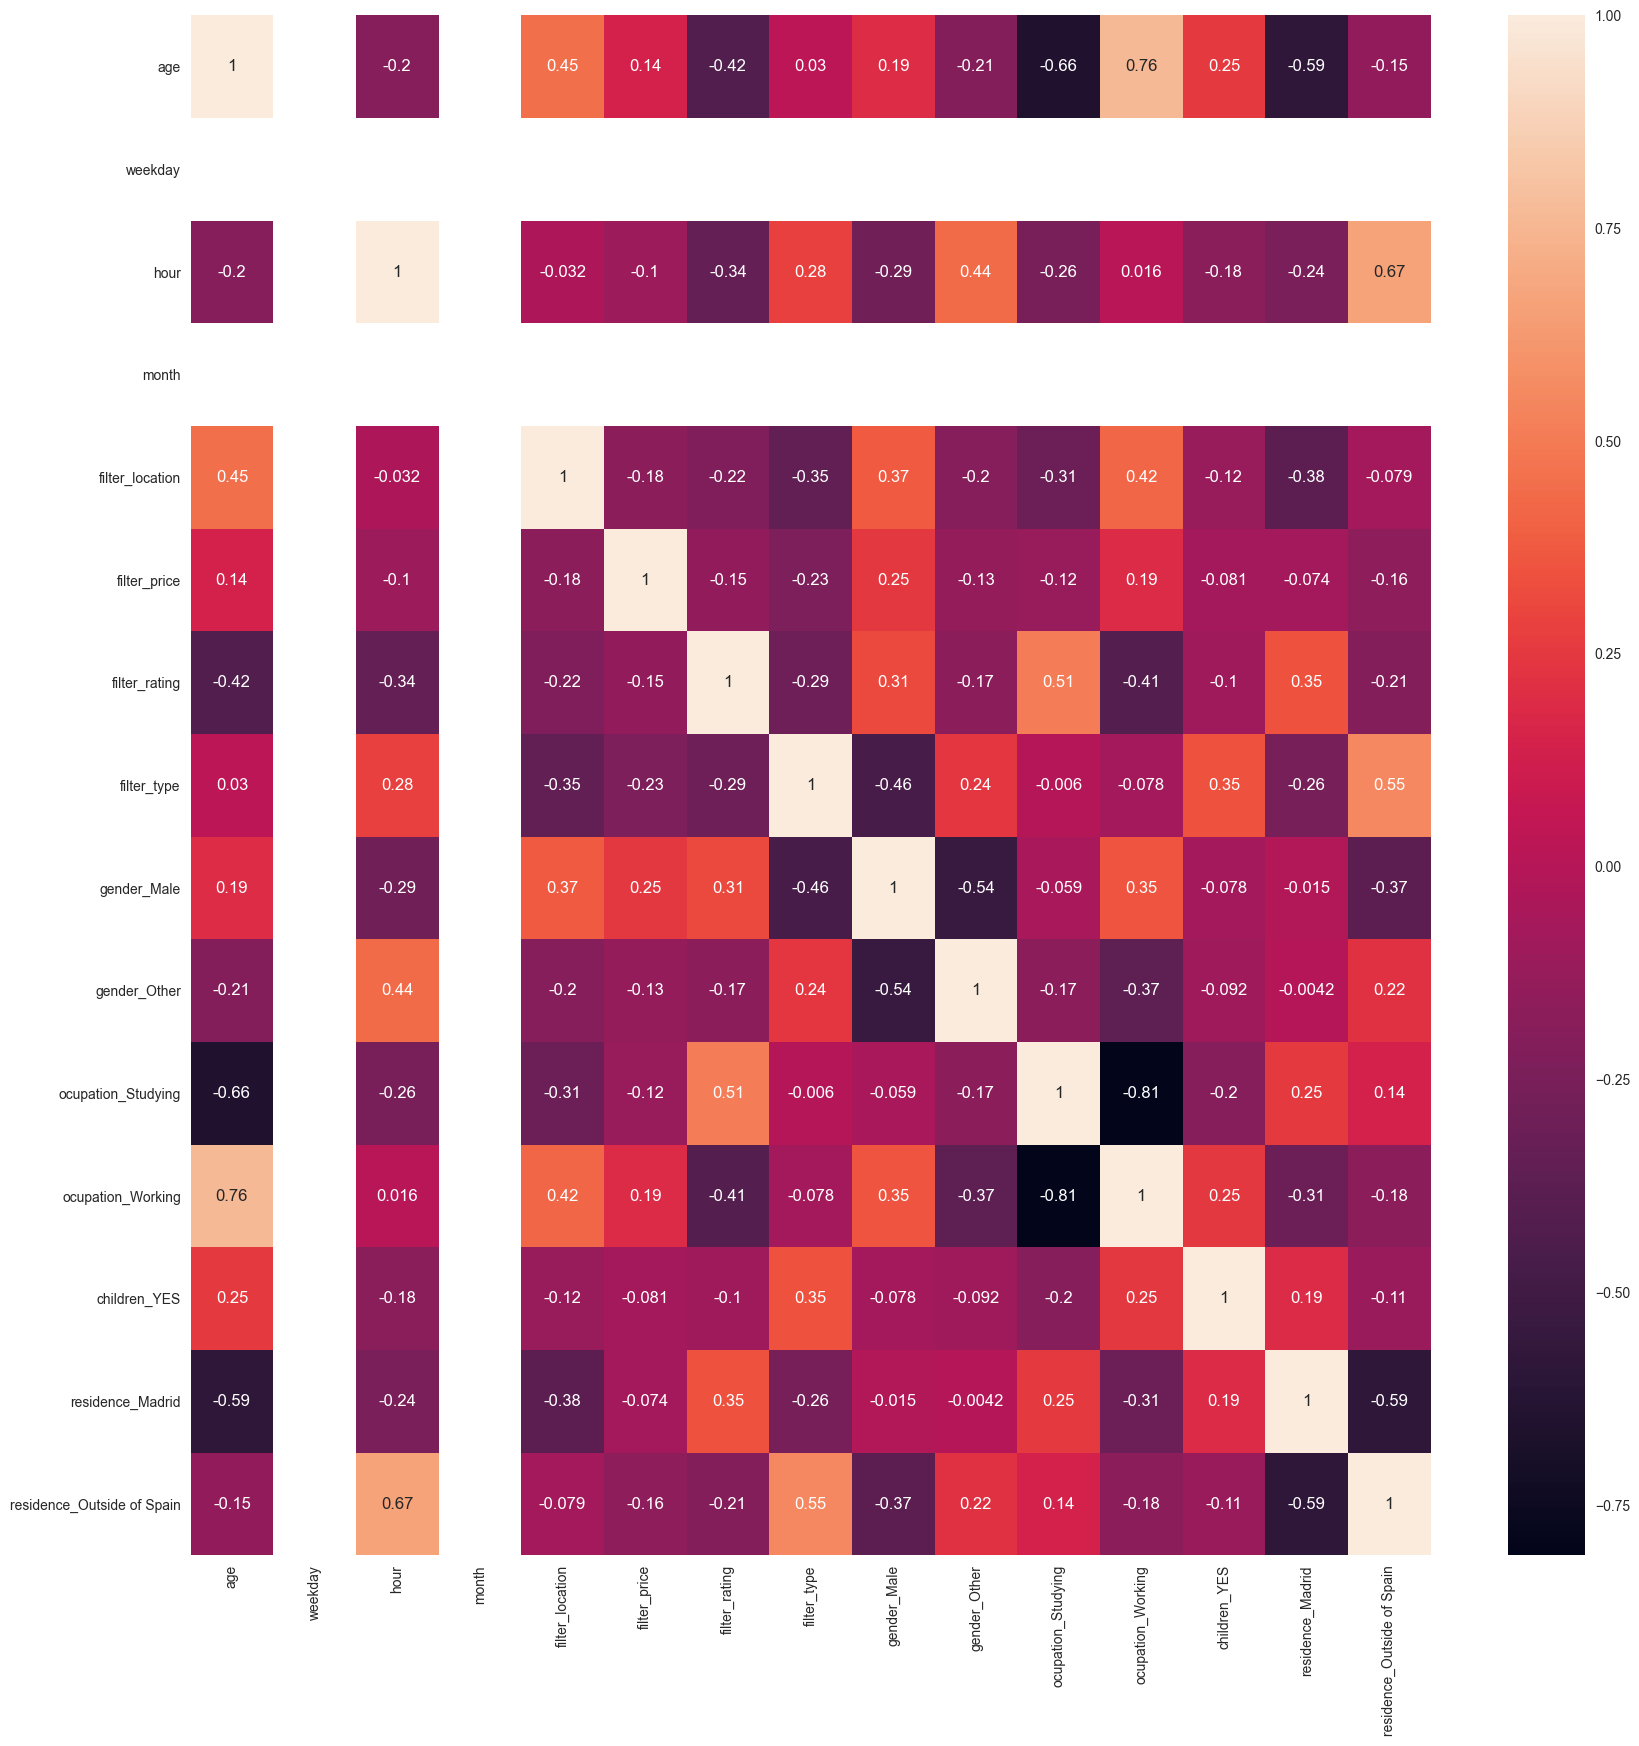

In [34]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df_dummy.corr(), annot=True, ax=ax)
fig

There's no strong correlation between values, we keep all of them

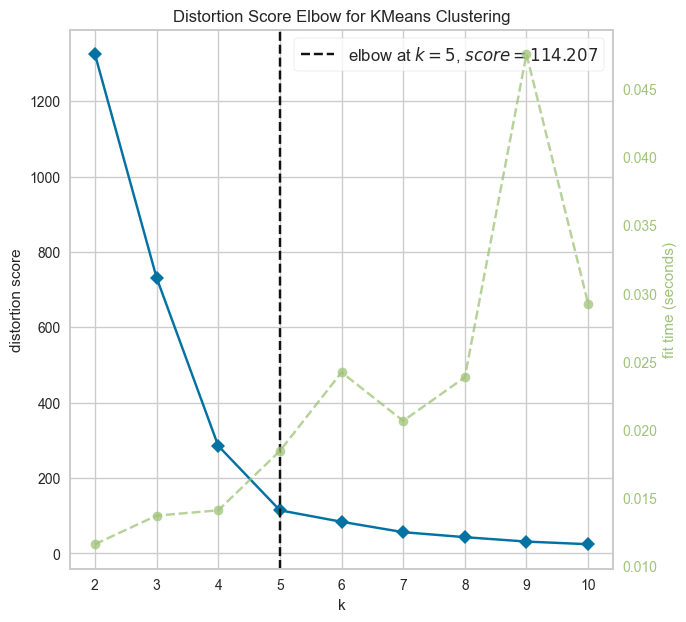

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [51]:
fig, axm = plt.subplots(figsize=(7, 7))
X = df_dummy
model = KElbowVisualizer(KMeans(), k=10)
model.fit(X)
model.show(ax=axm)

Following the elbow method, it is suggested to take 5 clusters.

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [42]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
labels = kmeans.predict(X)
df_dummy["cluster"] = labels
df_2["cluster"] = labels

### 1st Cluster

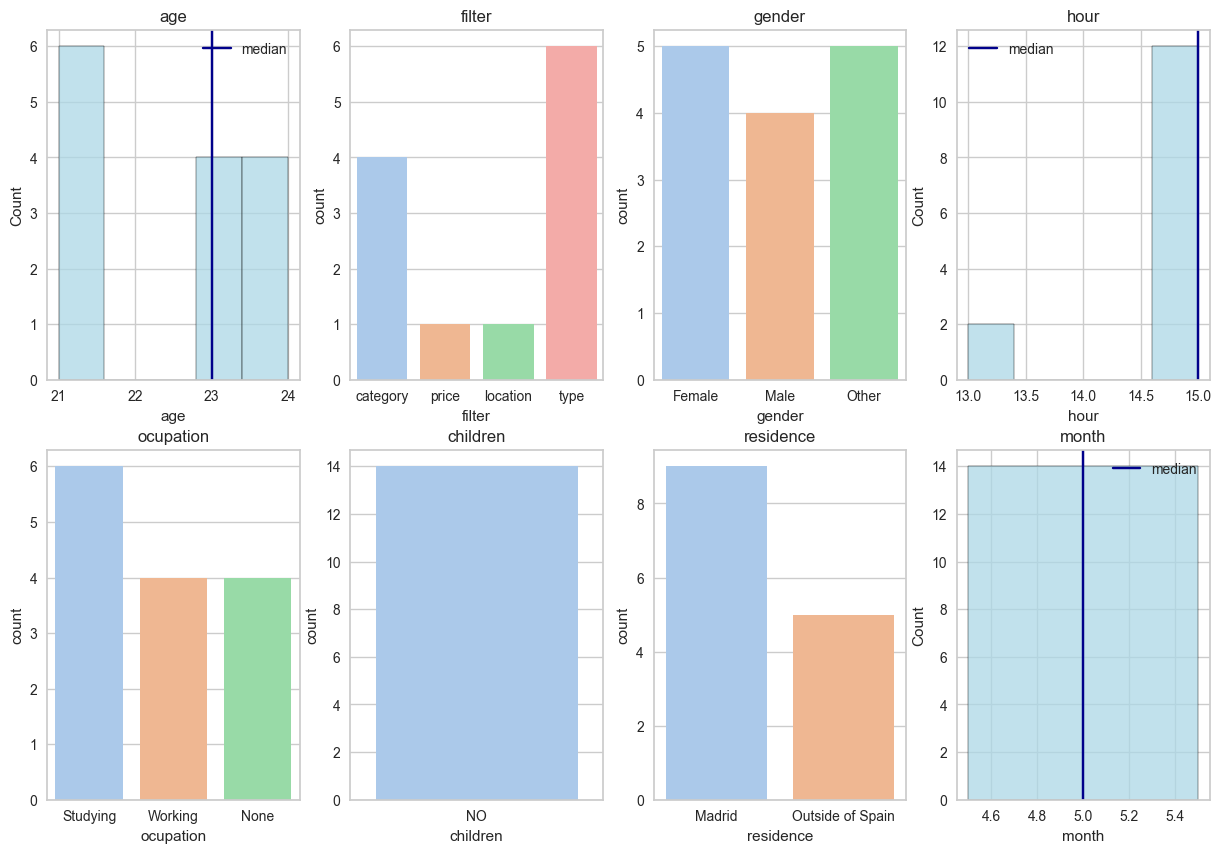

In [43]:
s.clustersplot(df_2[df_2["cluster"]==0])

### 2nd Cluster

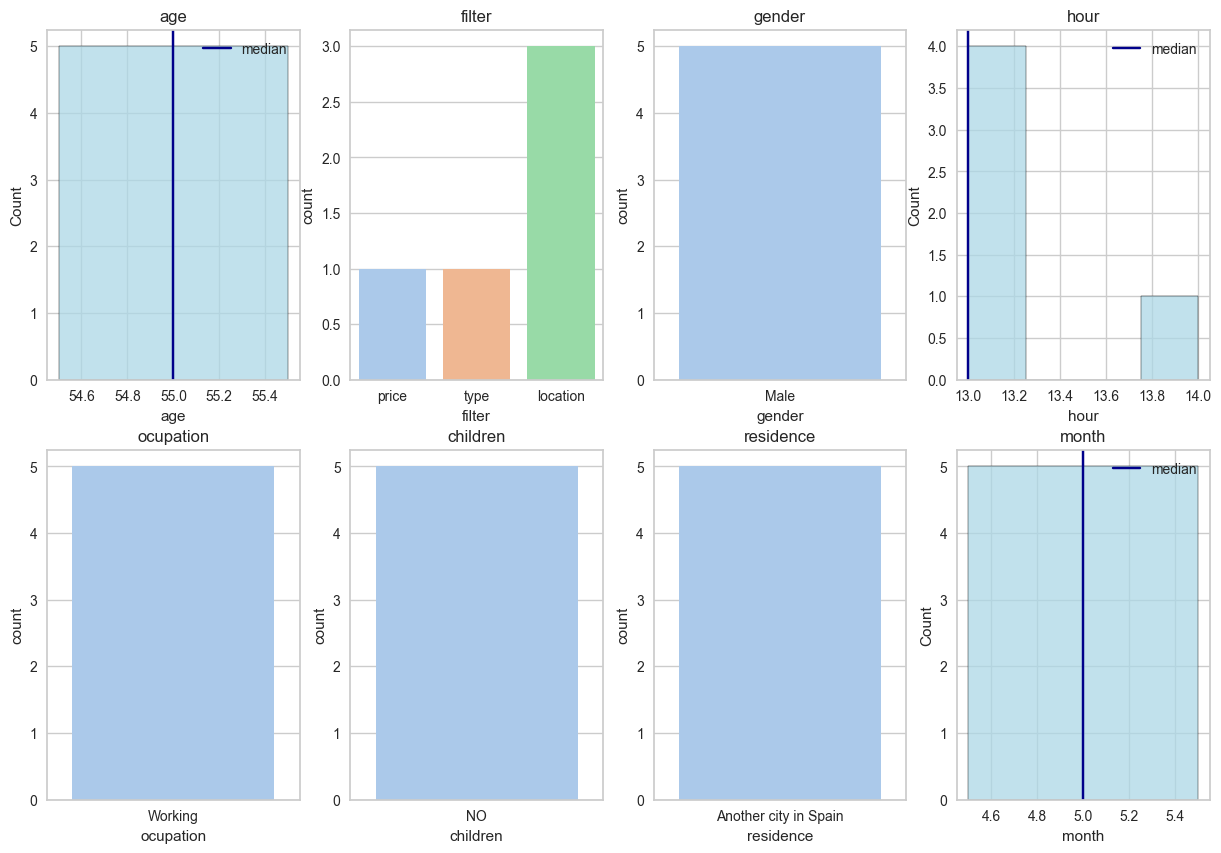

In [44]:
s.clustersplot(df_2[df_2["cluster"]==1])

### 3rd Cluster

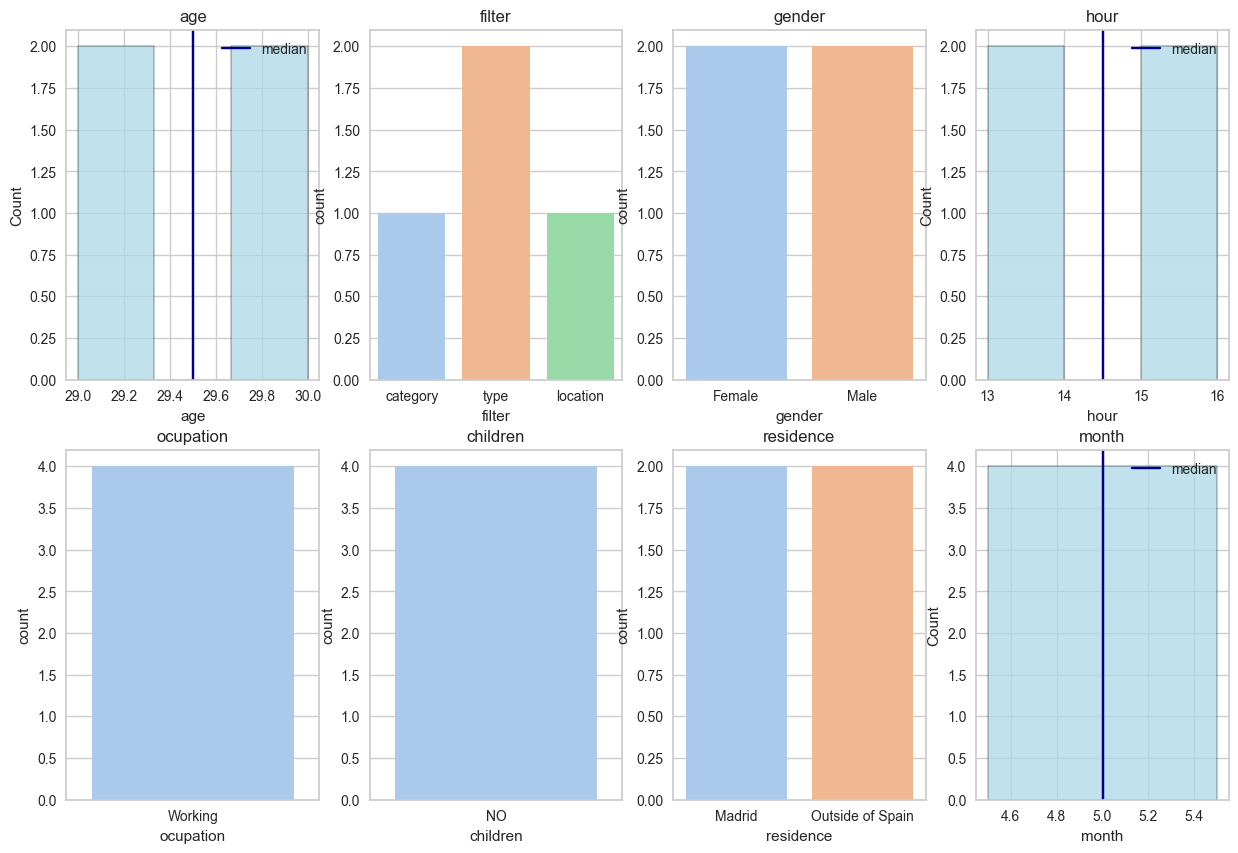

In [45]:
s.clustersplot(df_2[df_2["cluster"]==2])

### 4th Cluster

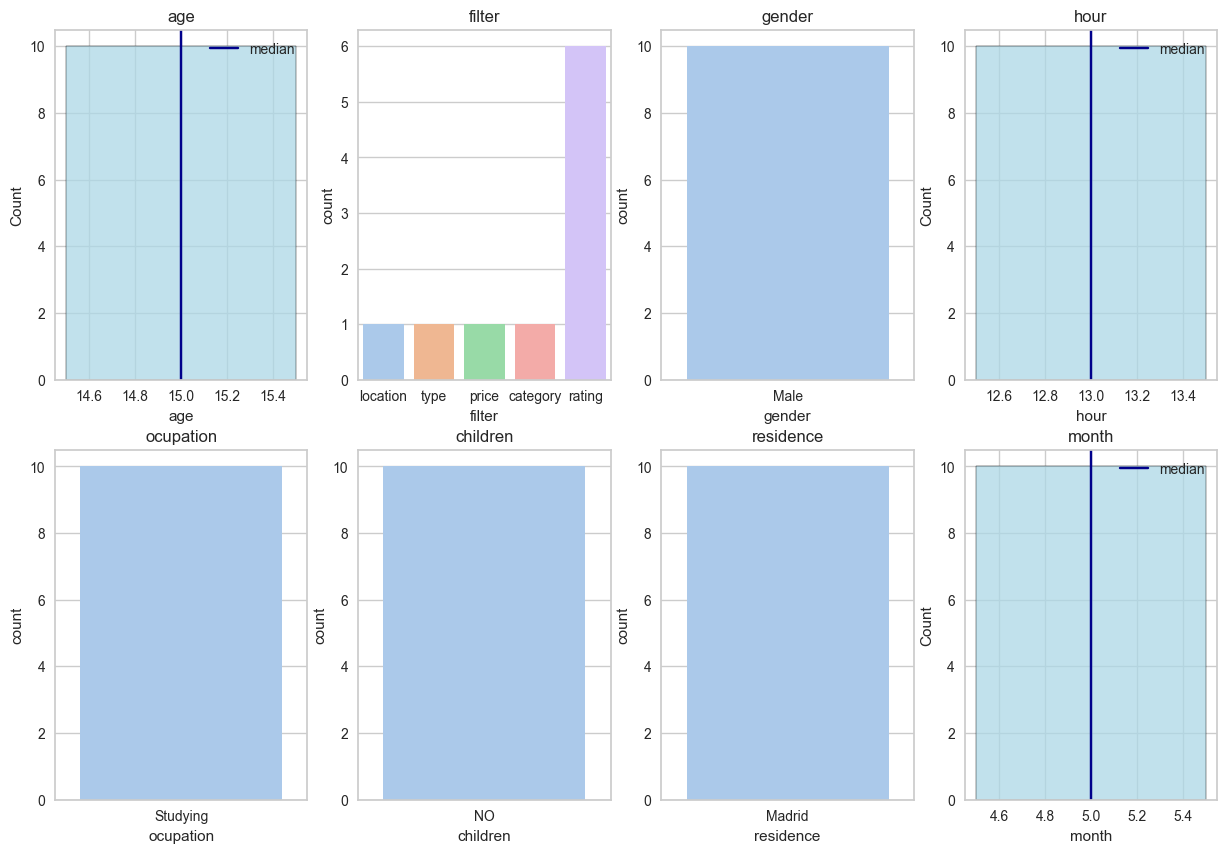

In [46]:
s.clustersplot(df_2[df_2["cluster"]==3])

### 5th Cluster

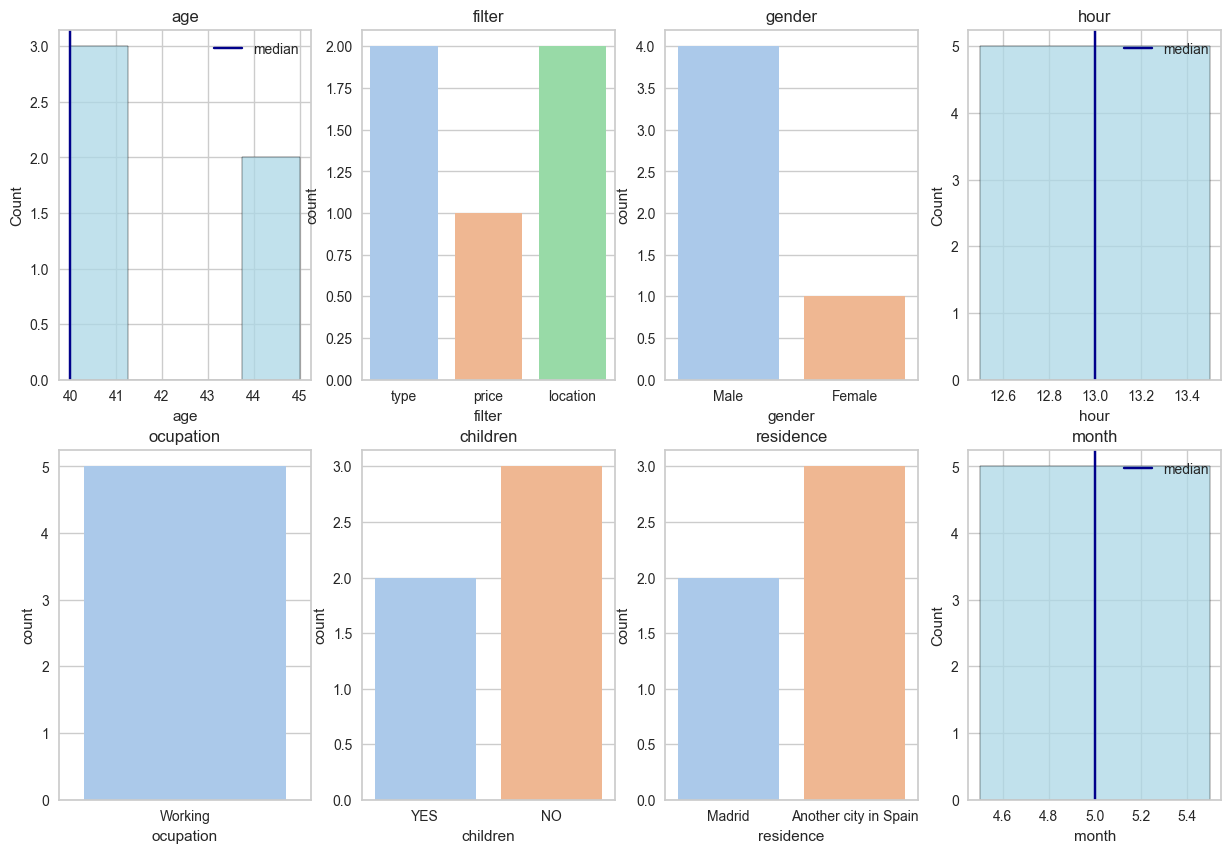

In [47]:
s.clustersplot(df_2[df_2["cluster"]==4])